I am trying to demonstrate use of Linear Regression using Listings data. 
First, we are trying to get a rough idea and to demonstrate Regresssion analysis on all numeric features of Listings Data.
Then, we train the model using sklearn on 20% of data and projected prices for the properties. Although, the results can't be proven beyond doubt that this model works best, the objective is to learn and demonstrate use of regression method.
Lastly, I've saved the output from Test and Train datasets and ran some manual tests, it seems, predicted prices are generally influenced by various "numeric features".

This analysis helps property owners to "correctly" price their properties to attract customers.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from IPython import display
import collections
from time import time
from itertools import chain
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.svm import SVR
import seaborn as sns
import qgrid
import datetime
import sympy as S
import scipy
from sklearn.linear_model import LinearRegression

df_listings = pd.read_csv("../seattlelistings.csv")
df_calendar = pd.read_csv("../seattlecalendar.csv")
df_reviews = pd.read_csv("../seattlereviews.csv")

In [2]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [3]:
Y = df_listings['price']
x = df_listings.drop('price', axis=1)

In [4]:
for col in df_listings:
    if (df_listings[col].isnull().any()):
        print(col)

summary
space
neighborhood_overview
notes
transit
thumbnail_url
medium_url
xl_picture_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_has_profile_pic
host_identity_verified
neighbourhood
zipcode
property_type
bathrooms
bedrooms
beds
square_feet
weekly_price
monthly_price
security_deposit
cleaning_fee
first_review
last_review
review_scores_rating
review_scores_accuracy
review_scores_cleanliness
review_scores_checkin
review_scores_communication
review_scores_location
review_scores_value
license
reviews_per_month


In [5]:
df_listings=df_listings.fillna(0)
df_listings['price']=df_listings['price'].replace('[\$,]', '', regex=True).astype(float)

In [6]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64','uint8']
numericdataX = df_listings.select_dtypes(include=numerics)
x= numericdataX['accommodates']

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


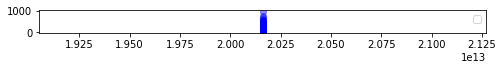

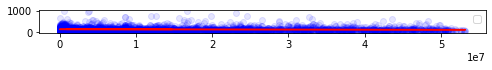

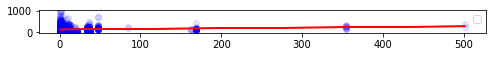

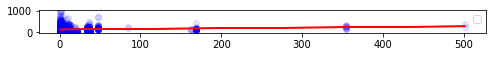

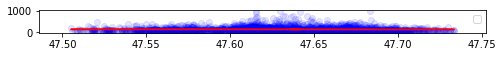

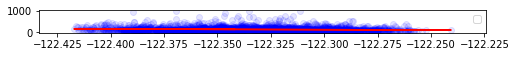

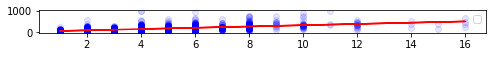

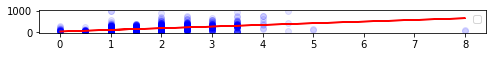

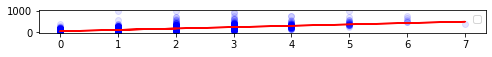

In [7]:
regressor = LinearRegression()
for i in range(1,10): 
    x= np.array(numericdataX.iloc[:,i]).reshape(-1,1)
    y= np.array(df_listings['price']).reshape(-1,1)
    regressor.fit(x,y)
    plt.figure(figsize=(8,5))
    plt.subplot(10,1,i)
    plt.scatter(x,y,color='blue', alpha=0.1)
    plt.plot(x,regressor.predict(x),color="red")
    plt.legend()

In [8]:
url_cols=[col for col in df_listings.columns.values if 'url' in col]

In [9]:
df_listings.drop(columns = url_cols ,inplace=True)

In [10]:
df_listings.cancellation_policy.value_counts()

strict      1417
moderate    1251
flexible    1150
Name: cancellation_policy, dtype: int64

In [11]:
Y= df_listings['price']

In [12]:
numericdataX= numericdataX.drop(['price'],axis=1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(numericdataX,Y, test_size=0.2, random_state=0)


In [14]:
#from sklearn import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
y_pred = regressor.predict(X_test)

In [16]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred}) 

In [17]:
df.to_csv('regression.csv')

In [18]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Square Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 40.14041399021257
Mean Squared Error: 4555.576159911491
Root Mean Squared Error: 67.49500840737403
R Square Score: 0.4232534033090378


In [19]:
df_listings.to_csv('numericadatax.csv')